# 2021 U.S. Traffic Accident Analysis

## Overview

Our project is to uncover patterns in traffic accidents across the US.
We'll examine relationships between location and volume and severity of accidents; impact of disruptions to traffic 
flow to accident severity; effects of weather on traffic safety; and related questions, as the data admits. 

In [1]:
#Import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets
import requests
import json
import seaborn as sns
from config import gkey 
from random import sample
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

In [2]:
#Load CSV
accident_data = pd.read_csv("Resources/2021_us_accidents.csv")
accident_data.head()

,Severity,Start_Lat,Start_Lng,State,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Visibility(mi),Crossing
0,2,42.382359,-71.022318,MA,False,False,False,Night,10.0,False
1,2,40.908676,-123.707116,CA,False,False,False,Night,2.0,False
2,2,38.970628,-77.116333,MD,False,False,False,Day,10.0,False
3,2,47.642651,-122.318590,WA,False,False,False,Day,10.0,False
4,2,37.419536,-122.090640,CA,False,False,False,Day,10.0,False


In [3]:
#Add a column to count each accident as 1
accident_data["# of accidents"] = 1
accident_data.head()

,Severity,Start_Lat,Start_Lng,State,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Visibility(mi),Crossing,# of accidents
0,2,42.382359,-71.022318,MA,False,False,False,Night,10.0,False,1
1,2,40.908676,-123.707116,CA,False,False,False,Night,2.0,False,1
2,2,38.970628,-77.116333,MD,False,False,False,Day,10.0,False,1
3,2,47.642651,-122.318590,WA,False,False,False,Day,10.0,False,1
4,2,37.419536,-122.090640,CA,False,False,False,Day,10.0,False,1


## Accidents by Location

#### How many accidents happened in 2021? 
* There were about 1.5 Million accidents reported in the US in 2021

#### Which states have the highest and lowest accident total?
* The three states with the highest recorded number of reported accidents were California, Florida, and Texas.
* The three states with the lowest recorded number of reported accidents were Maine, Vermont, and South Dakota.

In [4]:
#See how many rows there are
len(accident_data["State"])

1511745

In [5]:
#Pull out columns for the heatmap
accident_data[["Start_Lat","Start_Lng","State","Severity"]][724:737]

,Start_Lat,Start_Lng,State,Severity
724,34.404527,-117.567234,CA,2
725,38.068042,-77.330525,VA,4
726,25.659734,-80.416025,FL,2
727,25.657368,-80.415920,FL,2
728,40.587741,-111.922077,UT,2
729,26.736497,-80.090694,FL,2
730,33.773968,-117.818345,CA,2
731,25.733210,-80.307124,FL,2
732,25.733395,-80.301272,FL,2
733,25.733257,-80.305571,FL,2


In [6]:
#Create a sample for the limitations of our API key
sample = accident_data.sample(n = 10 , replace = False)
print(sample)

         Severity  Start_Lat   Start_Lng State  Roundabout   Stop  \
1288416         4  45.437485 -122.640103    OR       False  False   
1293082         2  37.179272  -79.429407    VA       False  False   
665434          2  25.697228  -80.414417    FL       False  False   
1052334         2  40.034235  -74.248634    NJ       False  False   
1135105         2  47.643223 -117.542512    WA       False  False   
465498          2  45.523599 -122.565182    OR       False  False   
56533           2  40.249027  -76.812564    PA       False  False   
1497878         2  35.161549  -81.905899    SC       False  False   
567519          2  39.928552  -76.823076    PA       False  False   
36130           2  40.665799 -105.189656    CO       False  False   

         Traffic_Signal Sunrise_Sunset  Visibility(mi)  Crossing  \
1288416            True          Night             1.0      True   
1293082           False          Night            10.0     False   
665434            False            D

In [7]:
ustates = []
for x in accident_data["State"]:
    if x not in ustates:
        ustates.append(x)
print(ustates)
#This list includes the continential US and Washington DC. (Excludes AK and HI)

['MA', 'CA', 'MD', 'WA', 'NC', 'FL', 'MO', 'TX', 'MN', 'AZ', 'AL', 'NJ', 'VA', 'SC', 'UT', 'TN', 'CO', 'NY', 'LA', 'PA', 'OR', 'WV', 'IL', 'AR', 'MT', 'DC', 'MI', 'NM', 'CT', 'MS', 'ND', 'IN', 'ID', 'GA', 'OH', 'NV', 'OK', 'DE', 'WY', 'KY', 'NH', 'NE', 'KS', 'IA', 'SD', 'RI', 'WI', 'ME', 'VT']


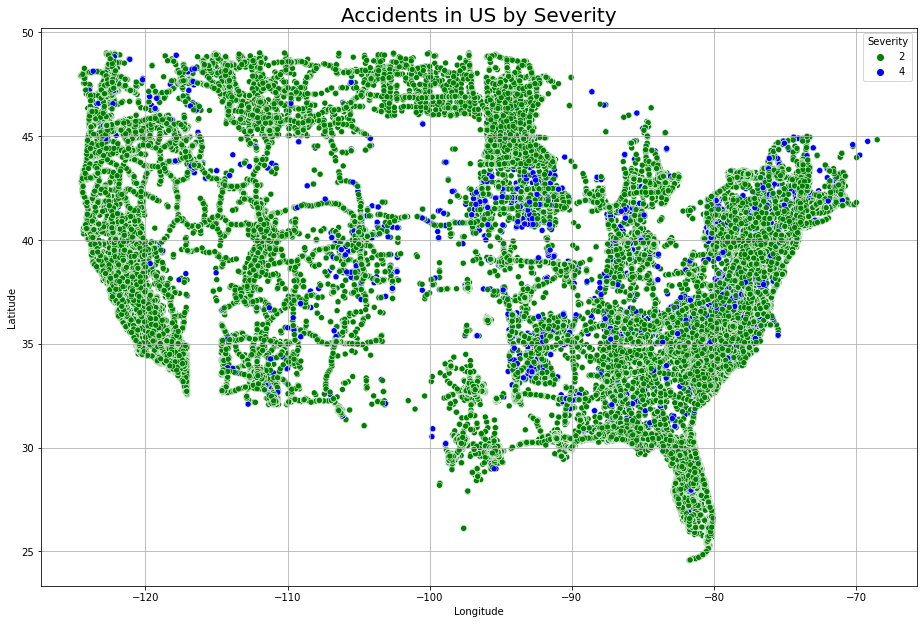

In [8]:
fig, ax = plt.subplots(figsize = (15.7,10.27))
_severity = ['1', '2', '3', '4']


sns.scatterplot(data = accident_data, x = "Start_Lng", y = "Start_Lat", hue = 'Severity', palette = ['green','blue'])

plt.title("Accidents in US by Severity", fontsize = 20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

In [9]:
#Sum of accident for each state
ustates = []
for x in accident_data["State"]:
    if x not in ustates:
        ustates.append(x)
for x in ustates:
    state_data = accident_data.loc[accident_data["State"] == x]
    print(f'{x} : {state_data["# of accidents"].sum()}')

MA : 816
CA : 388838
MD : 35691
WA : 10875
NC : 50519
FL : 278395
MO : 14136
TX : 83605
MN : 51164
AZ : 30053
AL : 11602
NJ : 26002
VA : 71940
SC : 66813
UT : 17683
TN : 34055
CO : 6890
NY : 56204
LA : 32190
PA : 64950
OR : 45358
WV : 4776
IL : 8247
AR : 7358
MT : 13327
DC : 5872
MI : 18782
NM : 1001
CT : 16278
MS : 2808
ND : 1863
IN : 10116
ID : 5161
GA : 12005
OH : 3293
NV : 2854
OK : 3348
DE : 2799
WY : 667
KY : 1196
NH : 78
NE : 1249
KS : 4359
IA : 5446
SD : 22
RI : 852
WI : 187
ME : 6
VT : 16


In [10]:
#Create a data frame of the top 3 states with the most accidents
top_three = accident_data[["Start_Lat","Start_Lng","State","# of accidents"]]
top_three.reset_index()

reduced_top = top_three.loc[(top_three["State"] == "CA") | (top_three["State"] == "FL") | (top_three["State"] == "TX") | (top_three["State"] == "MN")]
reduced_top

,Start_Lat,Start_Lng,State,# of accidents
1,40.908676,-123.707116,CA,1
4,37.419536,-122.090640,CA,1
6,28.472602,-81.394669,FL,1
10,34.067525,-117.555253,CA,1
11,29.672940,-95.263134,TX,1
...,...,...,...,...
1511739,26.606448,-80.068698,FL,1
1511740,33.932945,-118.280711,CA,1
1511741,34.172340,-118.532685,CA,1
1511743,37.998126,-121.811133,CA,1


In [11]:
#Create an equal sample of each state to fit the limitations of the google heat map
ca_sample = reduced_top.loc[reduced_top["State"] == "CA"]
reduced_ca_sample = ca_sample.sample(n=10000)

fl_sample = reduced_top.loc[reduced_top["State"] == "FL"]
reduced_fl_sample = fl_sample.sample(n=10000)

tx_sample = reduced_top.loc[reduced_top["State"] == "TX"]
reduced_tx_sample = tx_sample.sample(n=10000)

mn_sample = reduced_top.loc[reduced_top["State"] == "MN"]
reduced_mn_sample = mn_sample.sample(n=10000)

In [12]:
#Combine CA and FL
cafl_sample = pd.merge(reduced_ca_sample,reduced_fl_sample, on=["State","Start_Lat","Start_Lng","# of accidents"], how= "left")
cafl_sample

,Start_Lat,Start_Lng,State,# of accidents
0,34.285576,-118.468218,CA,1
1,33.876566,-118.076207,CA,1
2,33.902503,-118.260385,CA,1
3,37.983279,-122.041637,CA,1
4,34.154672,-118.254958,CA,1
...,...,...,...,...
9995,36.890618,-121.747374,CA,1
9996,34.154495,-118.377960,CA,1
9997,33.855466,-117.970026,CA,1
9998,33.864899,-118.208224,CA,1


In [13]:
#Combine the CAFL with TX to get a data frame of all three states
cafl_sample = pd.merge(reduced_ca_sample,reduced_fl_sample, on=["State","Start_Lat","Start_Lng","# of accidents"], how= "outer")
three_states = pd.merge(cafl_sample,reduced_tx_sample, on= ["State","Start_Lat","Start_Lng","# of accidents"], how= "outer")
three_states.head

<bound method NDFrame.head of        Start_Lat   Start_Lng State  # of accidents
0      34.285576 -118.468218    CA               1
1      33.876566 -118.076207    CA               1
2      33.902503 -118.260385    CA               1
3      37.983279 -122.041637    CA               1
4      34.154672 -118.254958    CA               1
...          ...         ...   ...             ...
29995  29.757610  -95.496204    TX               1
29996  32.962243  -96.768949    TX               1
29997  32.678281  -96.680670    TX               1
29998  30.449219  -97.790755    TX               1
29999  32.747524  -96.862410    TX               1

[30000 rows x 4 columns]>

In [14]:
#Add MN to the top three accidents
top_three_and_mn = pd.merge(three_states,reduced_mn_sample, on= ["State","Start_Lat","Start_Lng","# of accidents"], how= "outer")
top_three_and_mn

,Start_Lat,Start_Lng,State,# of accidents
0,34.285576,-118.468218,CA,1
1,33.876566,-118.076207,CA,1
2,33.902503,-118.260385,CA,1
3,37.983279,-122.041637,CA,1
4,34.154672,-118.254958,CA,1
...,...,...,...,...
39995,44.866244,-93.637157,MN,1
39996,45.022906,-93.089889,MN,1
39997,44.999535,-92.984703,MN,1
39998,46.279391,-95.981165,MN,1


In [17]:
#Code for heatmap to show top 3 states with the most accidents
gmaps_key = gmaps.configure(api_key = gkey)
locations_top3 = top_three_and_mn[["Start_Lat","Start_Lng"]]
weights_top3 = top_three_and_mn["# of accidents"]

In [18]:
#Code to display heatmap
fig5 = gmaps.figure()
fig5.add_layer(gmaps.heatmap_layer(locations_top3, weights = weights_top3))
fig5

Figure(layout=FigureLayout(height='420px'))

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

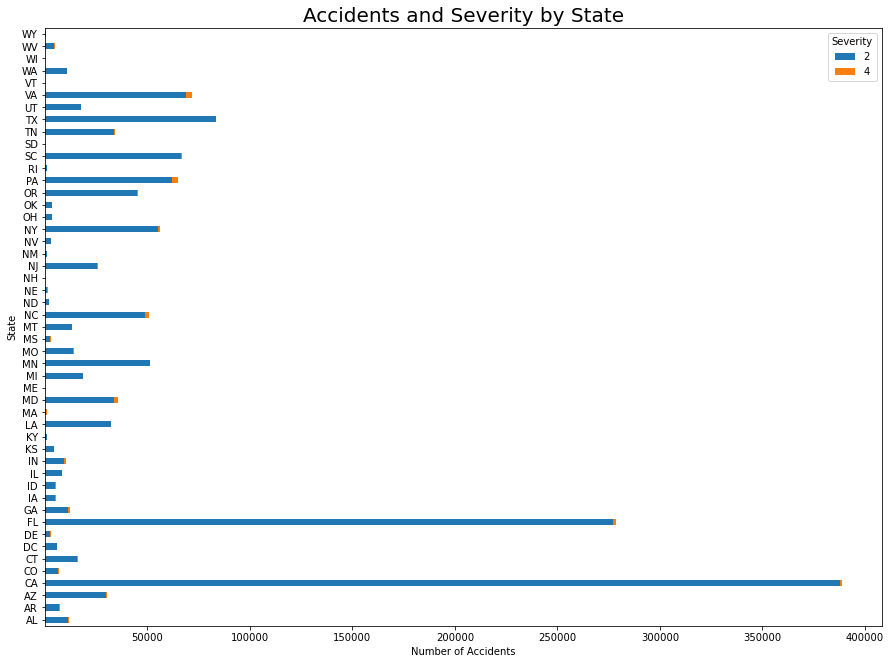

In [19]:
# Create a bar chart to show the accidents and severity by state
accbystate = accident_data[["State", "Severity","# of accidents"]]
accbystate.groupby(['State', 'Severity']).size().unstack().plot(kind = 'barh', stacked = True, figsize = (15, 11))
plt.title("Accidents and Severity by State", fontsize = 20)
plt.xlabel("Number of Accidents")
plt.tight_layout

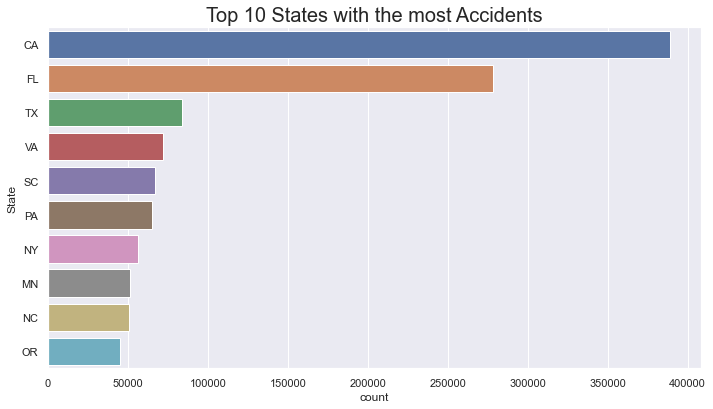

In [20]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(11.7,6.27))
sns.countplot(y = "State", data = accident_data, order=accident_data.State.value_counts().iloc[:10].index).set_title('Top 10 States with the most Accidents', fontsize = 20);

## Visibility (Weather and Daylight)

#### How does visibility affect likelihood of accidents?
##### Daylight vs. Nighttime
 * 64.62% of accidents happened during the day and only 35.38% happened at night. Although night driving is thought to be more dangerous, there is much more traffic during the day.
 
##### Weather visibility
 * The number of accidents vs visibility yielded a positive relationship. We have $r^2 \approx 0.5940$ which corresponds to a moderate fit.

In [21]:
vis_data = accident_data.groupby("Visibility(mi)").count()
vis_data["# of accidents"]

Visibility(mi)
0.00         2145
0.06           72
0.12          474
0.19           10
0.25         7203
0.38           96
0.50         6407
0.63           51
0.75         5567
0.88           35
1.00        24056
2.00        26902
3.00        23726
4.00        24586
5.00        28391
6.00        25974
7.00        40593
8.00        29565
9.00        35850
10.00     1193773
12.00           1
13.00        1543
15.00        1214
16.00           1
20.00         503
23.00           6
25.00         139
30.00           7
40.00         212
50.00          16
60.00           7
70.00           9
75.00           5
80.00         108
90.00           4
100.00         32
140.00          1
Name: # of accidents, dtype: int64

In [22]:
#Create a data frame to be used in the scatter plot
vis_data.reset_index(inplace = True)
vis_data.head()

,Visibility(mi),Severity,Start_Lat,Start_Lng,State,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Crossing,# of accidents
0,0.00,2145,2145,2145,2145,2145,2145,2145,2142,2145,2145
1,0.06,72,72,72,72,72,72,72,72,72,72
2,0.12,474,474,474,474,474,474,474,474,474,474
3,0.19,10,10,10,10,10,10,10,10,10,10
4,0.25,7203,7203,7203,7203,7203,7203,7203,7194,7203,7203


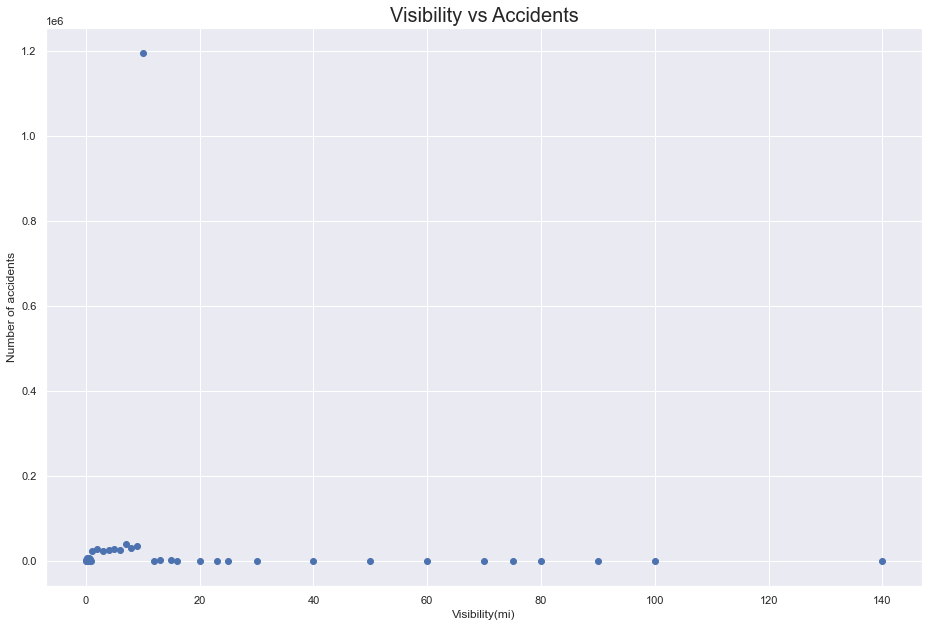

In [23]:
#Scatter plot of visibility vs accidents
groupby = accident_data.groupby(['Visibility(mi)'])['# of accidents'].sum()
x_values = vis_data["Visibility(mi)"]
y_values = vis_data["# of accidents"]
plt.scatter(x_values,y_values)
plt.xlabel("Visibility(mi)")
plt.ylabel("Number of accidents")
plt.title("Visibility vs Accidents", fontsize = 20)
fig1 = plt.gcf()
fig1.set_size_inches(15.7,10.27)
plt.show()


In [24]:
adj_vis_data = accident_data[["Visibility(mi)","# of accidents"]]
#Create adjusted visilibity data so anything over 10 will now read 10
adj_vis_data["Adjusted_Visibility"] = adj_vis_data["Visibility(mi)"]
adj_vis_data.loc[adj_vis_data["Visibility(mi)"] > 10, "Adjusted_Visibility"] = 10
#Create adjusted visilibity data so anything 0-.25 = .25
adj_vis_data.loc[adj_vis_data["Visibility(mi)"] <= .25, "Adjusted_Visibility"] = .25
#Create adjusted visilibity data so anything .26-.50 = .5
adj_vis_data.loc[adj_vis_data["Visibility(mi)"].between(.25,.5), "Adjusted_Visibility"] = .5
#Create adjusted visilibity data so anything .51-.75=.75
adj_vis_data.loc[adj_vis_data["Visibility(mi)"].between(.5,.75), "Adjusted_Visibility"] = .75
#Create adjusted visilibity data so anything .76-1=1
adj_vis_data.loc[adj_vis_data["Visibility(mi)"].between(.75,1), "Adjusted_Visibility"] = 1
#Create new dataframe with only Adjusted Visibility under 10
adj_vis_data = adj_vis_data.loc[adj_vis_data["Visibility(mi)"] < 10]
adj_vis_data.head(10)

,Visibility(mi),# of accidents,Adjusted_Visibility
1,2.0,1,2.0
29,7.0,1,7.0
41,7.0,1,7.0
42,9.0,1,9.0
45,2.0,1,2.0
53,1.0,1,1.0
60,5.0,1,5.0
62,4.0,1,4.0
64,2.0,1,2.0
65,1.0,1,1.0


In [25]:
#Group and count accidents per visibility
adj_vis_data_group = adj_vis_data.groupby("Adjusted_Visibility").count()
adj_vis_data_group.reset_index(inplace = True)
adj_vis_data_group

,Adjusted_Visibility,Visibility(mi),# of accidents
0,0.25,2701,2701
1,0.50,7299,7299
2,0.75,6458,6458
3,1.00,29658,29658
4,2.00,26902,26902
5,3.00,23726,23726
6,4.00,24586,24586
7,5.00,28391,28391
8,6.00,25974,25974
9,7.00,40593,40593


The r-squared is: 0.5938511314332263


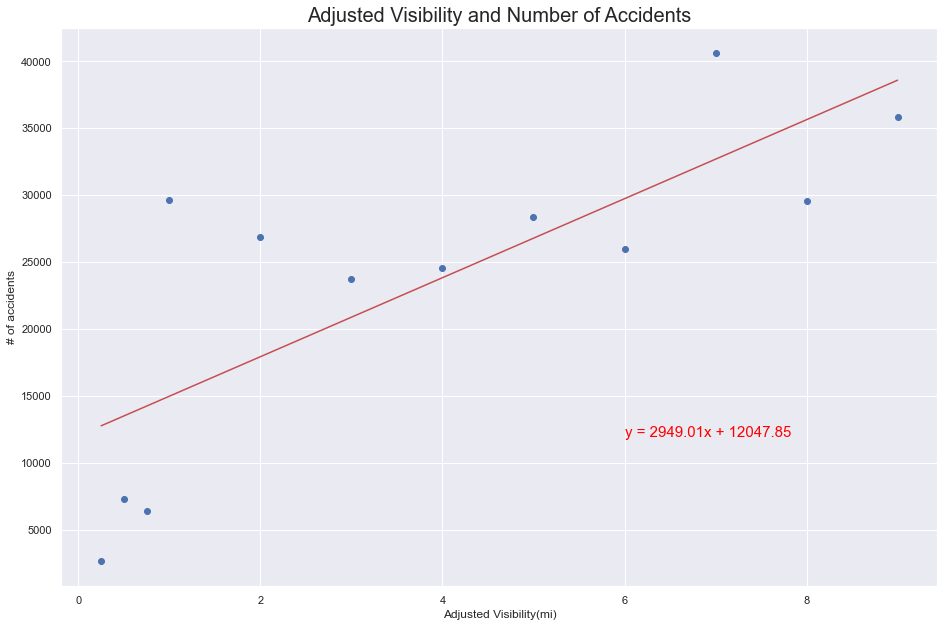

In [26]:
#Plot the scatter plot for adjusted visibility and # of accidents
x_values = adj_vis_data_group["Adjusted_Visibility"]
y_values = adj_vis_data_group["# of accidents"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12000),fontsize=15,color="red")
plt.xlabel("Adjusted Visibility(mi)")
plt.ylabel("# of accidents")
plt.title("Adjusted Visibility and Number of Accidents", fontsize = 20)
print(f"The r-squared is: {rvalue**2}")
fig3 = plt.gcf()
fig3.set_size_inches(15.7,10.27)
plt.show()

Text(0.5, 1.0, 'Number of Accidents Day vs Night')

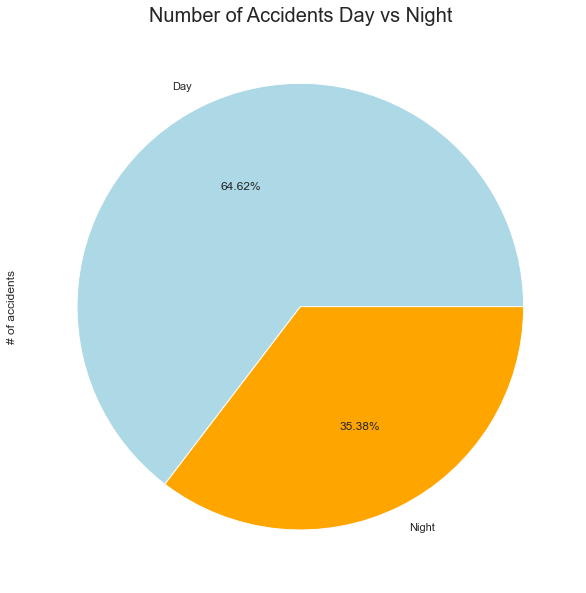

In [27]:
#Create and format a pie chart for day vs night accidents
daynight = accident_data[["Sunrise_Sunset","# of accidents"]].groupby("Sunrise_Sunset").count()
colors2 = ["lightblue","orange"]
daynight.plot.pie(y = "# of accidents",colors = colors2 , legend = False, autopct = "%1.2f%%")
fig4 = plt.gcf()
fig4.set_size_inches(15.7,10.27)
plt.title("Number of Accidents Day vs Night", fontsize = 20)

## Traffic Distruptions

**Alternative Hypothesis:** Traffic obstructions help to reduce the number of accidents.

**Null Hypothesis:** Traffic obstructions have no effect on the number of accidents.

**Chi-Squared Test**
#### How do traffic distruptions affect the total number of accidents?
* 83.4% of all traffic accidents in 2021 were not near a traffic obstruction (signal, stop sign, roundabout, or crosswalk)
* Only 0.006% of accidents happened at a roundabout, 2% at a stopsign, 7.2% at a crosswalk, and 7.4% at a traffic signal.
* Using a Chi-squared hypothesis test, we were able to determine that fewer accidents occur near traffic obstruction, p-value near 0.

In [28]:
#Create a data frame to use for distrubtions pie chart
day_disruptions = accident_data[["Sunrise_Sunset", "Stop", "Roundabout", "Traffic_Signal", "Crossing", "# of accidents"]]
day_disruptions.loc[day_disruptions["Sunrise_Sunset"] =='Day', "Sunrise_Sunset"] = 1
day_disruptions.loc[day_disruptions["Sunrise_Sunset"] =='Night', "Sunrise_Sunset"] = 0
day_disruptions.head(5)

,Sunrise_Sunset,Stop,Roundabout,Traffic_Signal,Crossing,# of accidents
0,0,False,False,False,False,1
1,0,False,False,False,False,1
2,1,False,False,False,False,1
3,1,False,False,False,False,1
4,1,False,False,False,False,1


In [29]:
roundabouts = (day_disruptions.loc[day_disruptions["Roundabout"] == True]).sum()
stop = (day_disruptions.loc[day_disruptions["Stop"] == True]).sum()
signal = (day_disruptions.loc[day_disruptions["Traffic_Signal"] == True]).sum()
crosswalk = (day_disruptions.loc[day_disruptions["Crossing"] == True]).sum()
none = day_disruptions.loc[(day_disruptions["Roundabout"] == False) & (day_disruptions["Stop"] == False) & (day_disruptions["Traffic_Signal"] == False) & (day_disruptions["Crossing"] == False)].sum()

Text(0.5, 1.0, 'Accidents by Disruption')

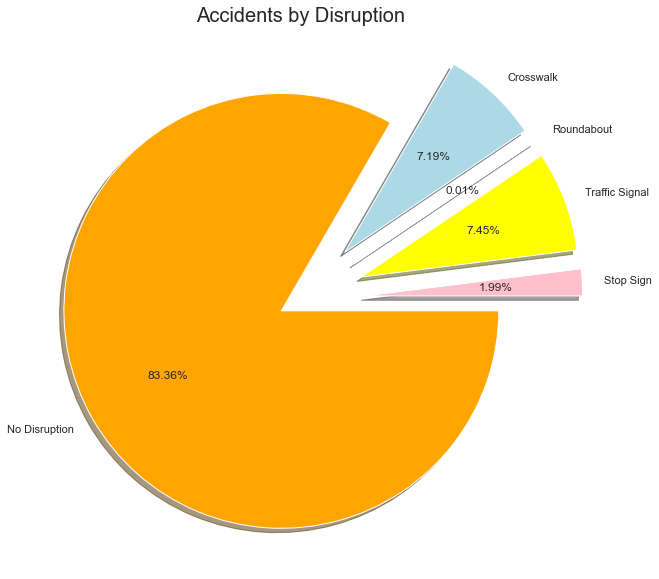

In [30]:
distruptions = [stop["Stop"], signal["Traffic_Signal"],  roundabouts["Roundabout"], crosswalk["Crossing"], none["# of accidents"]]
distruption_labels = ["Stop Sign","Traffic Signal", "Roundabout", "Crosswalk", "No Disruption"]
colors = ["pink","yellow", "lightgreen", "lightblue", "orange"]
explode = (0.3,0.3,0.3,0.3,0.1)
plt.pie(distruptions, explode=explode, labels=distruption_labels, colors=colors, autopct="%1.2f%%", shadow=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Accidents by Disruption", fontsize = 20)

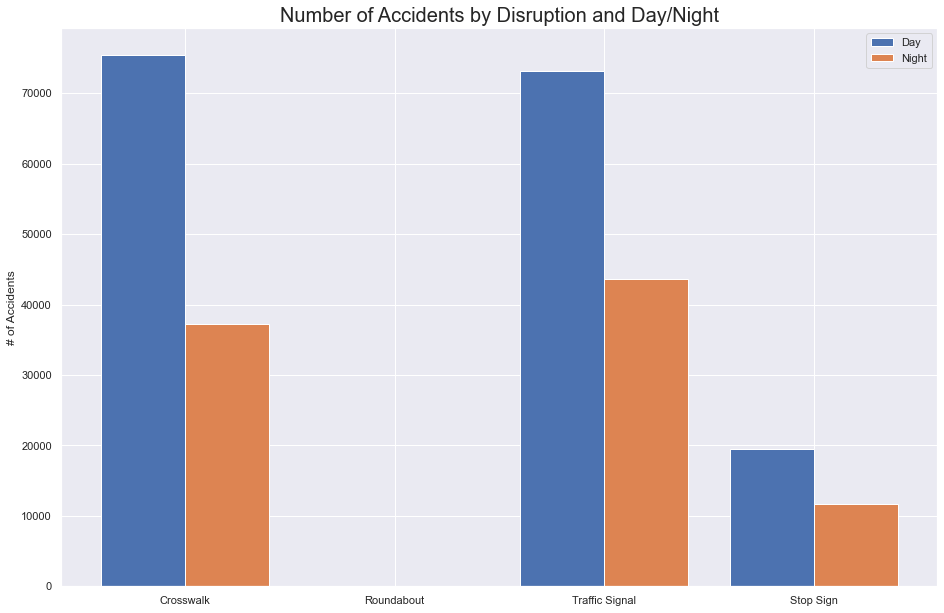

In [31]:
labels = ['Crosswalk','Roundabout', 'Traffic Signal', 'Stop Sign']
# Get data for each disruption and Day/Night
x = np.arange(4)
y1 = crosswalk["Sunrise_Sunset"],roundabouts["Sunrise_Sunset"], signal["Sunrise_Sunset"], stop["Sunrise_Sunset"]
y2 =  crosswalk["Crossing"]-crosswalk["Sunrise_Sunset"],roundabouts["Roundabout"]-roundabouts["Sunrise_Sunset"], signal["Traffic_Signal"]-signal["Sunrise_Sunset"], stop["Stop"]-stop["Sunrise_Sunset"]
width = 0.40
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.ylabel('# of Accidents')
plt.title('Number of Accidents by Disruption and Day/Night', fontsize = 20)
plt.xticks(x, labels)
plt.legend(["Day", "Night"])
fig4 = plt.gcf()
fig4.set_size_inches(15.7,10.27)
plt.show()

In [32]:
# Declare Variables
accidents_roundabout = roundabouts["# of accidents"]
accidents_stop = stop["# of accidents"]
accidents_signal = signal["# of accidents"]
accidents_crosswalk = crosswalk["# of accidents"]
accidents_no_obstruction = none["# of accidents"]
print(accidents_roundabout)
print(accidents_stop)
print(accidents_signal)
print(accidents_crosswalk)
print(accidents_no_obstruction)
# Calculate total number of accidents and the expected number of accidents
accidents_total = accidents_roundabout + accidents_stop + accidents_signal + accidents_crosswalk + accidents_no_obstruction
expected = accidents_total / 5
print(accidents_total)
print(expected)

87
31207
116747
112782
1306800
1567623
313524.6


In [33]:
# Create a dataframe with number of observed and expected accidents
accidents_obstruction_df = pd.DataFrame({
    "Observed": [accidents_roundabout, accidents_stop, accidents_signal, accidents_crosswalk,accidents_no_obstruction],
    "Expected": [expected, expected, expected, expected, expected]
})
accidents_obstruction_df

,Observed,Expected
0,87,313524.6
1,31207,313524.6
2,116747,313524.6
3,112782,313524.6
4,1306800,313524.6


In [34]:
# Run the chi square test with stats.chisquare()
stats.chisquare(accidents_obstruction_df['Observed'], accidents_obstruction_df['Expected'])

Power_divergenceResult(statistic=3966391.7661491316, pvalue=0.0)

## Analysis

#### How many accidents happened in 2021? 
* There were about 1.5 Million accidents reported in the US in 2021

#### Which states have the highest and lowest accident total?
* The three states with the highest recorded number of reported accidents were California, Florida, and Texas.
* The three states with the lowest recorded number of reported accidents were Maine, Vermont, and South Dakota.

#### How does visibility affect likelihood of accidents?
##### Daylight vs. Nighttime
 * 64.62% of accidents happened during the day and only 35.38% happened at night. Although night driving is thought to be more dangerous, there is much more traffic during the day.
 
##### Weather visibility
 * The number of accidents vs visibility yielded a positive relationship. We have $r^2 \approx 0.5940$ which corresponds to a moderate fit.

#### How do traffic distruptions affect the total number of accidents?
* 83.4% of all traffic accidents in 2021 were not near a traffic obstruction (signal, stop sign, roundabout, or crosswalk)
* Only 0.006% of accidents happened at a roundabout, 2% at a stop sign, 7.2% at a crosswalk, and 7.4% at a traffic signal.
* Using a Chi-squared hypothesis test, we were able to determine that fewer accidents occur near traffic obstruction, p-value near 0.

## Limitations
* Alaska and Hawaii didn't report any traffic accident data.
* Size restriction for GitHub uploads. A lot of potentially interesting data needed to be cut out of the study.
* Traffic volume wasn't included in the data set.
* Visibility varied widely in terms of how it was reported.  In order to standardize, we eliminated 10 mi and above from the analysis as no impact.  Adjusted visibility values were calculated by rounding values under 1 mi up to the nearest quarter mile.
* 200,000 invalid Weather data.
* Used a subset of traffic distruptions in order to reduce our data size.
* Severity was related to the level of impact on traffic
* Very little diversity of severity in our dataset

## Lessons Learned
 - Checked to see if the dataset is not zipped. It can mislead you on the actual size if it is.
 - Having some point of reference for total miles of roadway or traffic volume
 - Looking back we could've done more with our time of day data or day in year data for a better correlation on when accidents will happen.